In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
funnel_df=pd.read_excel('Workerfunnel.xlsx')
funnel_df

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,0.734882
4,2015-01-01 00:00:00,Q1,Sewing,0.8,6720,56,0.800125
...,...,...,...,...,...,...,...
1157,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8,0.628333
1158,2015-11-03 00:00:00,Q2,Finishing,0.7,960,8,0.734882
1159,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8,0.625625
1160,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15,0.505889


In [4]:
funnel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1162 non-null   object 
 1   Quarter                1162 non-null   object 
 2   Department             1162 non-null   object 
 3   Targeted Productivity  1162 non-null   object 
 4   Overtime               1162 non-null   object 
 5   No. of Workers         1162 non-null   object 
 6   Actual Productivity    1162 non-null   float64
dtypes: float64(1), object(6)
memory usage: 63.7+ KB


In [6]:
funnel_df['Actual Productivity'] = pd.to_numeric(funnel_df['Actual Productivity'], errors='coerce')

# Convert the other selected features to numeric, coercing errors to NaN
funnel_df['Targeted Productivity'] = pd.to_numeric(funnel_df['Targeted Productivity'], errors='coerce')
funnel_df['Overtime'] = pd.to_numeric(funnel_df['Overtime'], errors='coerce')
funnel_df['No. of Workers'] = pd.to_numeric(funnel_df['No. of Workers'], errors='coerce')

In [19]:
funnel_df['Targeted Productivity'].fillna(funnel_df['Targeted Productivity'].mean(), inplace=True)
funnel_df['Overtime'].fillna(funnel_df['Overtime'].mean(), inplace=True)
funnel_df['No. of Workers'].fillna(funnel_df['No. of Workers'].mean(), inplace=True)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_11700\652091171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  funnel_df['Targeted Productivity'].fillna(funnel_df['Targeted Productivity'].mean(), inplace=True)
C:\Users\Rahul\AppData\Local\Temp\ipykernel_11700\652091171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [20]:
funnel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1162 non-null   object 
 1   Quarter                1162 non-null   object 
 2   Department             1162 non-null   object 
 3   Targeted Productivity  1162 non-null   float64
 4   Overtime               1162 non-null   float64
 5   No. of Workers         1162 non-null   float64
 6   Actual Productivity    1162 non-null   float64
dtypes: float64(4), object(3)
memory usage: 63.7+ KB


Principal Component Analysis (PCA)

In [21]:

# Select features for PCA
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']
x = funnel_df[features]

x_standardized = StandardScaler().fit_transform(x)

In [22]:
# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(x_standardized)

#Determine the number of components that explain at least 90% of the variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.90) + 1



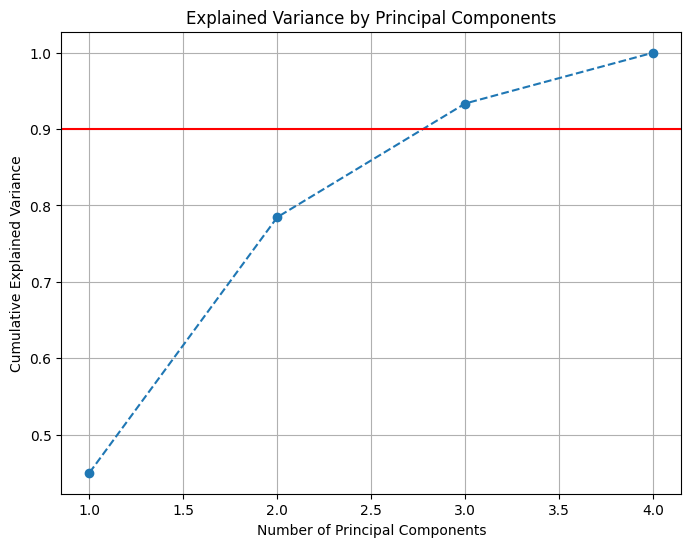

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [24]:
# Interpretation
interpretation = f"""
PCA Interpretation:
1. The first {n_components} principal components explain at least 90% of the variance in the data.
2. This suggests that we can reduce the dimensionality of our data to {n_components} components while retaining most of the information.
3. Each principal component is a linear combination of the original features, where the first few components capture the most variance.

"""

# Save interpretation to a text file
with open('PCA_interpretation.txt', 'w') as f:
    f.write(interpretation)

# Print the number of components
print(f"Number of principal components that explain at least 90% of the variance: {n_components}")

Number of principal components that explain at least 90% of the variance: 3


Predictive Modeling and Time Series Analysis

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from pandas.plotting import register_matplotlib_converters

In [31]:
register_matplotlib_converters()

# Convert the 'Date' column to datetime format
funnel_df['Date'] = pd.to_datetime(funnel_df['Date'], format='%m/%d/%Y')
funnel_df.set_index('Date', inplace=True)

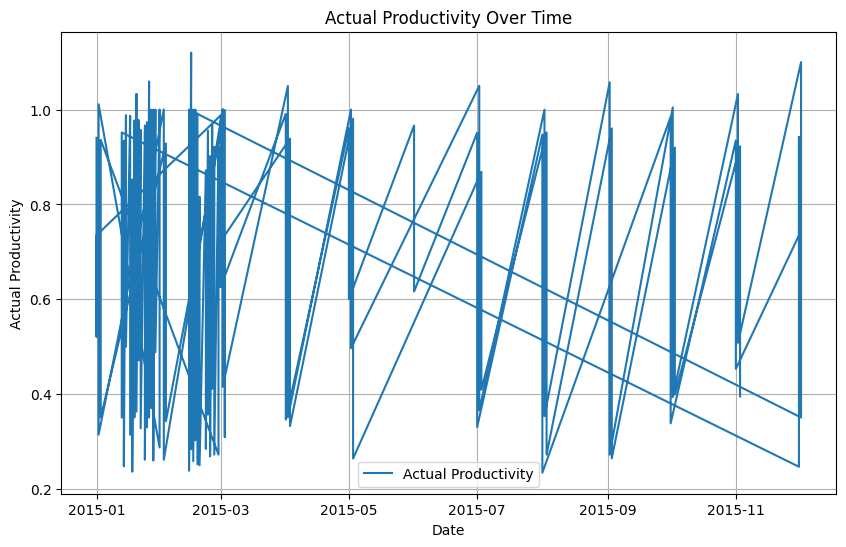

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(funnel_df['Actual Productivity'], label='Actual Productivity')
plt.title('Actual Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
# Define the ARIMA model
model = ARIMA(funnel_df['Actual Productivity'], order=(1, 1, 1)) 
model_fit = model.fit()

# Forecast the next 4 quarters (4 weeks)
forecast = model_fit.forecast(steps=4)

# Get the actual last 4 weeks data for comparison
actual = funnel_df['Actual Productivity'][-4:]


c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

In [35]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(actual, forecast)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual, forecast)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')


Mean Absolute Percentage Error (MAPE): 0.3261
Mean Squared Error (MSE): 0.0352


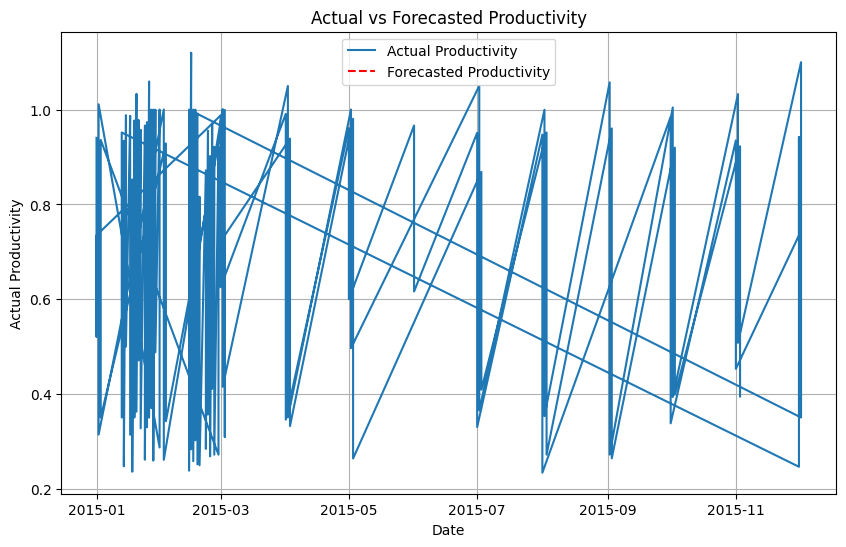

In [36]:
# Combine actual and forecast for visualization
forecast_index = pd.date_range(start=funnel_df.index[-1] + pd.Timedelta(days=1), periods=4, freq='W')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(funnel_df['Actual Productivity'], label='Actual Productivity')
plt.plot(forecast_series, label='Forecasted Productivity', linestyle='--', color='red')
plt.title('Actual vs Forecasted Productivity')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.grid(True)
plt.show()


Clustering Analysis


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

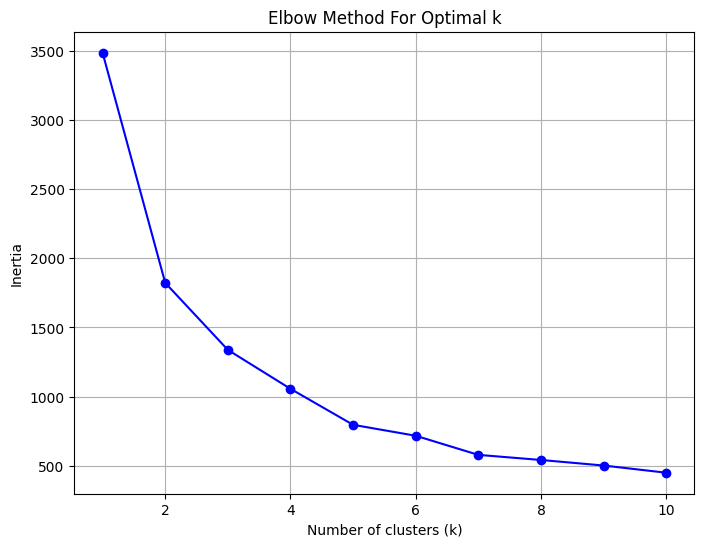

In [39]:
Features = ['Actual Productivity', 'Overtime', 'No. of Workers']

scaler = StandardScaler()
X = scaler.fit_transform(funnel_df[Features])
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [40]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

funnel_df['Cluster'] = clusters

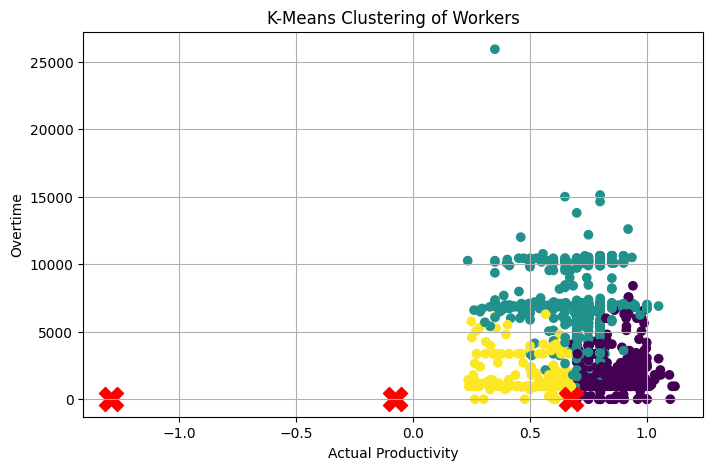

In [42]:
# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(funnel_df['Actual Productivity'], funnel_df['Overtime'], c=funnel_df['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  
plt.xlabel('Actual Productivity')
plt.ylabel('Overtime')
plt.title('K-Means Clustering of Workers')
plt.grid(True)
plt.show()
